In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm   
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time 
from sklearn.model_selection import cross_val_score

In [170]:
np.random.seed(32)
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.columns)
print(df_train['SalePrice'].describe())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

C:\Users\Martin Le\AppData\Local\Temp\ipykernel_4844\396872846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], fit=norm, ax=ax[0])
C:\Users\Martin Le\AppData\Local\Temp\ipykernel_4844\396872846.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_train['SalePr

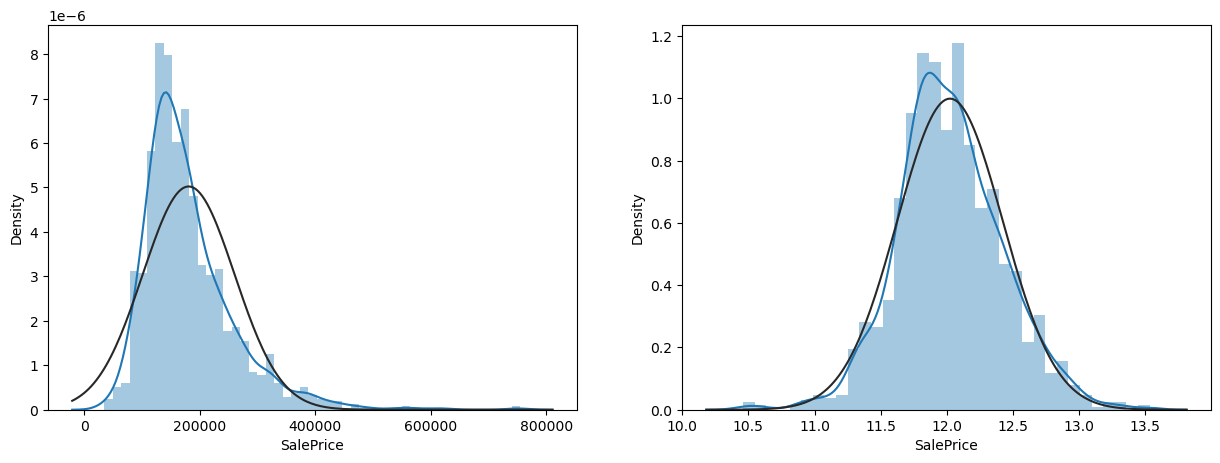

In [171]:


fig, ax = plt.subplots(1,2, figsize=(15,5)) 
sns.distplot(df_train['SalePrice'], fit=norm, ax=ax[0])
sns.distplot(np.log(df_train['SalePrice']), fit=norm, ax=ax[1])
df_train["SalePrice"] = np.log(df_train['SalePrice'])
df_trainnormal = pd.read_csv('train.csv')

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].hist(df_train['SalePrice'], bins=50)
axes[0].set_title('SalePrice')
axes[0].set_xticks(range(0, 800000, 175000))
log_price = np.log(df_train['SalePrice'])
axes[1].hist(log_price, bins=50)
axes[1].set_title('Log SalePrice')
axes[1].set_xticks(range(10, 15))
plt.show()

C:\Users\Martin Le\AppData\Local\Temp\ipykernel_4844\1584787128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


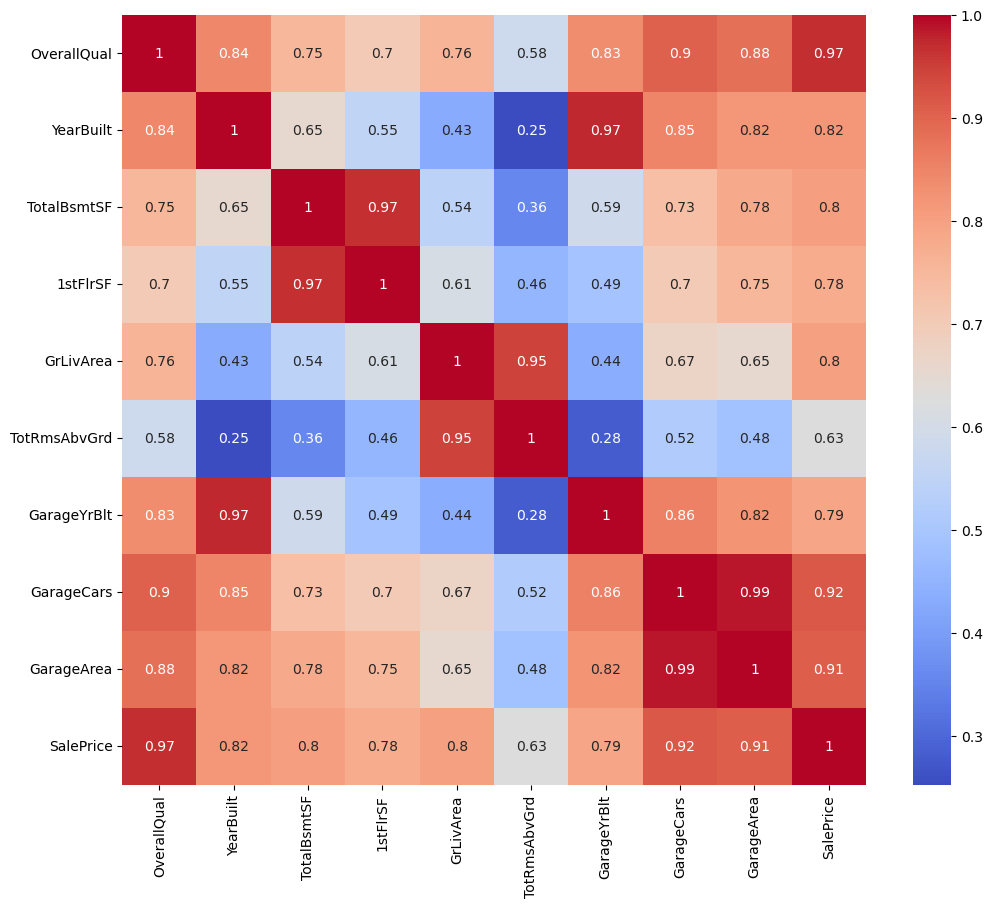

In [172]:
corr_matrix = df_train.corr()   
threshold = 0.7
mask = np.eye(corr_matrix.shape[0], dtype=bool) 
max_corr = corr_matrix.where(~mask).abs().max()
valid_col = max_corr > threshold
filtered_df = corr_matrix.loc[:, valid_col]
filtered_corr = filtered_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.show()

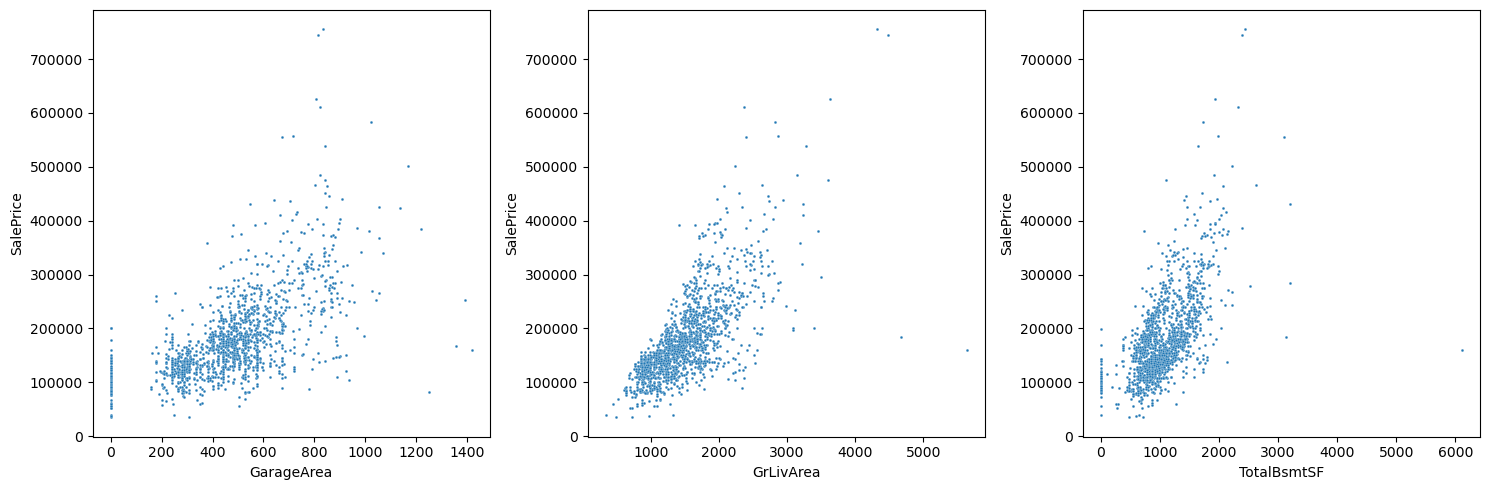

In [173]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
s= 4
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_trainnormal, ax=ax[0],s= s)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_trainnormal, ax=ax[1],s= s)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_trainnormal, ax=ax[2],s= s)
plt.tight_layout()
plt.show()

In [174]:

#missing data
whole_data = pd.concat((df_train, df_test)).reset_index(drop=True)
whole_data.drop(['SalePrice'], axis=1, inplace=True)

missing_values_train =  df_train.isnull().sum().sort_values(ascending=False)
missing_values_train = missing_values_train[missing_values_train  > 0]
missing_values_whole = whole_data.isnull().sum().sort_values(ascending=False)
missing_values_whole = missing_values_whole[missing_values_whole  > 0]
print(missing_values_whole)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageCars         1
KitchenQual        1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
dtype: int64


In [175]:
#dealing with missing data
var_cat = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
for i in var_cat:
    whole_data[i] = whole_data[i].fillna('None')
var_num = ['LotFrontage','GarageYrBlt' ,'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for i in var_num:
    whole_data[i] = whole_data[i].fillna(0)
var_catmod = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Electrical', 'Exterior2nd', 'KitchenQual', 'SaleType']
for i in var_catmod:
    whole_data[i] = whole_data[i].fillna(whole_data[i].mode()[0])
whole_data["MSZonig"] = whole_data["MSZoning"].fillna(whole_data["MSZoning"].mode()[0])
missing_values_whole = whole_data.isnull().sum().sort_values(ascending=False)
missing_values_whole = missing_values_whole[missing_values_whole  > 0]
print(missing_values_whole)
whole_data = whole_data.drop(['GarageYrBlt', 'PoolQC', 'Utilities'], axis=1)
#transforming some numerical variables that are really categorical
whole_data_dummy = pd.get_dummies(whole_data)
print(whole_data_dummy.shape)


Series([], dtype: int64)
(2919, 301)


In [176]:

#skewed features
numeric_cols = whole_data_dummy.select_dtypes(include=[np.number]).columns

threshold = 0.5
for col in numeric_cols:
    skewness = whole_data_dummy[col].skew()
    if skewness > threshold:
        whole_data_dummy[col] = np.log1p(whole_data_dummy[col])  # using log1p instead of log to handle zero values
X_train, X_test, y_train, y_test = train_test_split(whole_data_dummy[:df_train.shape[0]], df_train['SalePrice'], test_size=0.3, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1022, 301) (438, 301) (1022,) (438,)


In [177]:
#Linear Regression
lm_model = LinearRegression()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
fit = lm_model.fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))   
print('R2 Score:', metrics.r2_score(y_test, y_pred))


(1022, 301) (438, 301) (1022,) (438,)
Mean Absolute Error: 0.09679363700758531
Mean Squared Error: 0.027490130070472567
Root Mean Squared Error: 0.16580147788989266
R2 Score: 0.8231099017369713


In [178]:
#Ridge Regression
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.logspace(-4, 5.5, 20)
ridge_model = RidgeCV(alphas=alphas, cv= 5)
ridge_model.fit(X_train, y_train)
print('Optimal Alpha:', ridge_model.alpha_)

ridge_model = Ridge(alpha=ridge_model.alpha_)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
ypre = ridge_model.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))




Optimal Alpha: 3.1622776601683795
Mean Absolute Error: 0.08594026336444771
Mean Squared Error: 0.019571320284072595
Root Mean Squared Error: 0.13989753494637636
R2 Score: 0.8740648822209339


In [179]:
#Lasso Regression
from sklearn.linear_model import Lasso, LassoCV
alphas = np.logspace(-4, 5.5, 60)
lasso_model = LassoCV(alphas = alphas, cv=5, max_iter=100, tol=0.1)
lasso_model.fit(X_train, y_train)
print('Best alpha:', lasso_model.alpha_)

lasso_model = Lasso(alpha = lasso_model.alpha_)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))




Best alpha: 0.0004406236427773573
Mean Absolute Error: 0.08441736334122815
Mean Squared Error: 0.01910994620082383
Root Mean Squared Error: 0.13823872901912773
R2 Score: 0.8770336752645707


In [180]:
#Elasctic Net
from sklearn.linear_model import ElasticNetCV, ElasticNet
alphas = np.logspace(-4, 4.5, 10)
l1ratio = [.1, .5, 1]

en_model = ElasticNetCV(alphas=alphas, l1_ratio=l1ratio, cv=6, max_iter=1000, tol=0.12)
en_model.fit(X_train, y_train)

print('Optimal alpha: %.8f'%en_model.alpha_)
print('Optimal l1_ratio: %.3f'%en_model.l1_ratio_) 

en_model = ElasticNet(alpha=en_model.alpha_, l1_ratio=en_model.l1_ratio_)
en_model.fit(X_train, y_train)
y_pred = en_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))



Optimal alpha: 0.00087992
Optimal l1_ratio: 0.100
Mean Absolute Error: 0.08486711799439817
Mean Squared Error: 0.019521176765798412
Root Mean Squared Error: 0.13971820484746578
R2 Score: 0.8743875395474738


In [181]:

#Cross Validation
lm_scores = cross_val_score(lm_model, X_train, y_train, cv=7,scoring="r2")
ridge_scores = cross_val_score(ridge_model, X_train, y_train, cv=7, scoring="r2")
lasso_scores = cross_val_score(lasso_model, X_train, y_train, cv=7, scoring="r2")
en_model_scores = cross_val_score(en_model, X_train, y_train, cv=7, scoring="r2")

lm_mse_scores = cross_val_score(lm_model, X_train, y_train, cv=7,scoring="neg_mean_squared_error")
ridge_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=7, scoring="neg_mean_squared_error")
lasso_mse_scores = cross_val_score(lasso_model, X_train, y_train, cv=7, scoring="neg_mean_squared_error")
en_model_mse_scores = cross_val_score(en_model, X_train, y_train, cv=7, scoring="neg_mean_squared_error")


print('Linear Regression CV scores:', lm_scores.mean())
print('Ridge Regression CV scores:', ridge_scores.mean())
print('Lasso Regression CV scores:', lasso_scores.mean())
print('Elastic Net CV scores:', en_model_scores.mean())
print('Linear Regression CV MSE scores:', -1*lm_mse_scores.mean())
print('Ridge Regression CV MSE scores:', -1*ridge_mse_scores.mean())
print('Lasso Regression CV MSE scores:', -1*lasso_mse_scores.mean())
print('Elastic Net CV MSE scores:', -1*en_model_mse_scores.mean())
 

Linear Regression CV scores: 0.874680220854848
Ridge Regression CV scores: 0.9091860696747511
Lasso Regression CV scores: 0.9118849012227201
Elastic Net CV scores: 0.9090232114803556
Linear Regression CV MSE scores: 0.02000590531322968
Ridge Regression CV MSE scores: 0.015076408799371483
Lasso Regression CV MSE scores: 0.014582517923410006
Elastic Net CV MSE scores: 0.015059904979626827


In [182]:
start_time = time.time()

forward_feature_selector = SFS(LinearRegression(), k_features="best", forward=True, scoring='r2', cv=2)
forward_feature_selector = forward_feature_selector.fit(X_train, y_train)
fwd_selected_features = X_train.columns[list(forward_feature_selector.k_feature_idx_)]
print(fwd_selected_features)

X_train_fwd, X_test_fwd, y_train, y_test = train_test_split(X_train[fwd_selected_features], y_train, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train_fwd, y_train)
y_pred_fwd = regressor.predict(X_test_fwd)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_fwd))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_fwd))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_fwd)))
print('R2 Score:', metrics.r2_score(y_test, y_pred_fwd))
print("coefficients:", regressor.coef_) 
end_time = time.time()
print("Time taken:", end_time - start_time) # Time 6min

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_COD', 'SaleType_Con', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Family', 'SaleCondition_Normal', 'MSZonig_C (all)',
       'MSZonig_RM'],
      dtype='object', length=101)
Mean Absolute Error: 0.08608109921651314
Mean Squared Error: 0.016575419745416674
Root Mean Squared Error: 0.12874556204163573
R2 Score: 0.9085545830016695
coefficients: [ 7.70614571e-02  4.74381620e-02  2.76465107e-01  1.24528926e-03
  6.86350407e-04  1.89471647e-02 -3.36524236e-03  1.20140336e-01
 -1.99927808e-03  4.34795430e-01  2.48679700e-02  1.23226215e-02
  4.60765891e-02  4.90751973e-02  3.33770861e-03  5.97855861e-03
 -3.58416590e-02  2.54752196e-02  4.55694941e-02  5.94894834e-02
  2.33417769e-02  4.98352092e-02  9.05376947e-02  3.15216235e-02
  2.30504243e-01 -6.2

In [183]:
#Linear Regression with selected features
lm_fmodel = LinearRegression()
fit = lm_fmodel.fit(X_train_fwd, y_train)
y_pred = lm_fmodel.predict(X_test_fwd)
print('R2 Score:', metrics.r2_score(y_test, y_pred) )

#Ridge Regression with selected features
alphas = np.logspace(-4, 5.5, 20)
ridge_fmodel = RidgeCV(alphas=alphas, cv= 5)
ridge_fmodel.fit(X_train_fwd, y_train)
print('Optimal Alpha:', ridge_fmodel.alpha_)

ridge_fmodel = Ridge(alpha=ridge_fmodel.alpha_)
ridge_fmodel.fit(X_train_fwd, y_train)
y_pred = ridge_fmodel.predict(X_test_fwd)
print('R2 Score:', metrics.r2_score(y_test, y_pred))
#Lasso Regression with selected features
alphas = np.logspace(-4, 5.5, 60)
lasso_fmodel = LassoCV(alphas = alphas, cv=5, max_iter=100, tol=0.1)
lasso_fmodel.fit(X_train_fwd, y_train)
print('Best alpha:', lasso_fmodel.alpha_)
lasso_fmodel = Lasso(alpha = lasso_fmodel.alpha_)
lasso_fmodel.fit(X_train_fwd, y_train)
y_pred = lasso_fmodel.predict(X_test_fwd)
print('R2 Score:', metrics.r2_score(y_test, y_pred))
#Elastic Net with selected features
en_fmodel = ElasticNetCV(alphas=alphas, l1_ratio=l1ratio, cv=6, max_iter=1000, tol=0.12)
en_fmodel.fit(X_train_fwd, y_train)
print('Optimal alpha: %.8f'%en_fmodel.alpha_)
print('Optimal l1_ratio: %.3f'%en_fmodel.l1_ratio_)
en_fmodel = ElasticNet(alpha=en_fmodel.alpha_, l1_ratio=en_fmodel.l1_ratio_)
en_fmodel.fit(X_train_fwd, y_train)
y_pred = en_fmodel.predict(X_test_fwd)
print('R2 Score:', metrics.r2_score(y_test, y_pred))





R2 Score: 0.9085545830016695
Optimal Alpha: 0.1
R2 Score: 0.9105476877634338
Best alpha: 0.0001
R2 Score: 0.9107734811917896
Optimal alpha: 0.00010000
Optimal l1_ratio: 0.100
R2 Score: 0.9104587927864813


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.344e-02, tolerance: 1.275e-02
  model = cd_fast.enet_coordinate_descent(


In [184]:
#Cross Validation
lmf_scores = cross_val_score(lm_fmodel, X_train_fwd, y_train, cv=7,scoring="r2") 
ridgef_scores = cross_val_score(ridge_fmodel, X_train_fwd, y_train, cv=7, scoring="r2")
lassof_scores = cross_val_score(lasso_fmodel, X_train_fwd, y_train, cv=7, scoring="r2")
en_fmodel_scores = cross_val_score(en_fmodel, X_train_fwd, y_train, cv=7, scoring="r2")

lmf_mse_scores = cross_val_score(lm_fmodel, X_train_fwd, y_train, cv=7,scoring="neg_mean_squared_error")
ridgef_mse_scores = cross_val_score(ridge_fmodel, X_train_fwd, y_train, cv=7, scoring="neg_mean_squared_error")
lassof_mse_scores = cross_val_score(lasso_fmodel, X_train_fwd, y_train, cv=7, scoring="neg_mean_squared_error")
en_fmodel_mse_scores = cross_val_score(en_fmodel, X_train_fwd, y_train, cv=7, scoring="neg_mean_squared_error")


print('Linear Regression CV scores:', lm_scores.mean())
print('Ridge Regression CV scores:', ridge_scores.mean())
print('Lasso Regression CV scores:', lasso_scores.mean())
print('Elastic Net CV scores:', en_fmodel_scores.mean())
print('Linear Regression CV MSE scores:', -1*lmf_mse_scores.mean())
print('Ridge Regression CV MSE scores:', -1*ridgef_mse_scores.mean())
print('Lasso Regression CV MSE scores:', -1*lassof_mse_scores.mean())
print('Elastic Net CV MSE scores:', -1*en_fmodel_mse_scores.mean())


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e-02, tolerance: 1.127e-02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e-02, tolerance: 1.115e-02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e-02, toleranc

Linear Regression CV scores: 0.874680220854848
Ridge Regression CV scores: 0.9091860696747511
Lasso Regression CV scores: 0.9118849012227201
Elastic Net CV scores: 0.915087783707036
Linear Regression CV MSE scores: 0.01296326933986321
Ridge Regression CV MSE scores: 0.012909362847395228
Lasso Regression CV MSE scores: 0.013094135555934708
Elastic Net CV MSE scores: 0.012909560599703006


c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e-02, tolerance: 1.127e-02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e-02, tolerance: 1.115e-02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.452e-02, toleranc

(0.9, 0.92)

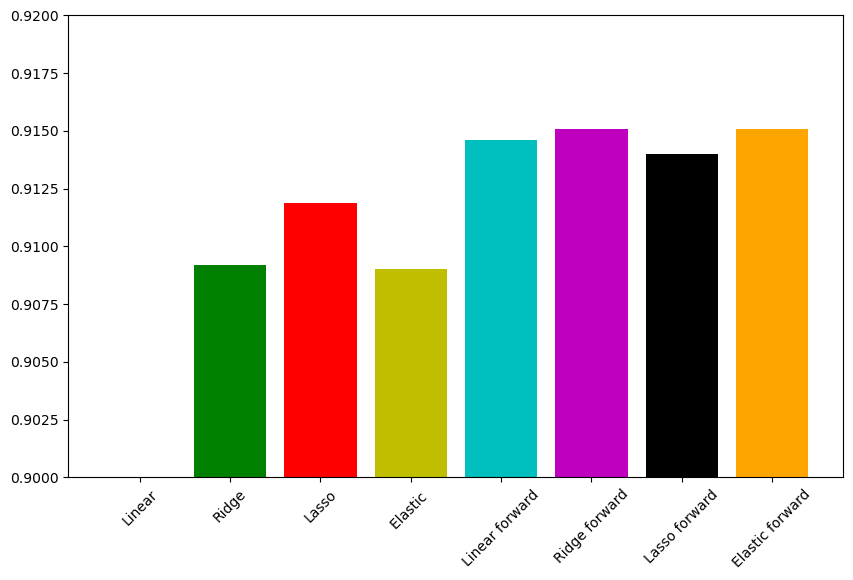

In [185]:
#Comparing the results
plt.figure(figsize=(10, 6))
plt.bar('Linear',lm_scores.mean(), color='b')
plt.bar('Ridge',ridge_scores.mean(), color='g')
plt.bar('Lasso',lasso_scores.mean(), color='r')
plt.bar('Elastic ',en_model_scores.mean(), color='y')
plt.bar('Linear forward',lmf_scores.mean(), color='c')
plt.bar('Ridge forward',ridgef_scores.mean(), color='m')
plt.bar('Lasso forward',lassof_scores.mean(), color='k')
plt.bar('Elastic forward',en_fmodel_scores.mean(), color='orange')
plt.xticks(rotation=45)
plt.ylim(0.9, 0.92)


(0.01, 0.022)

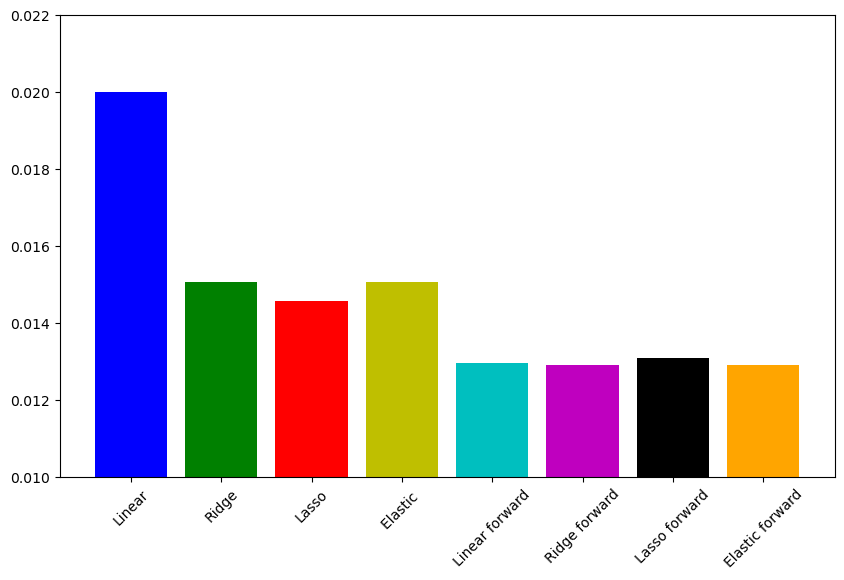

In [189]:
#Comparing the results with MSE
plt.figure(figsize=(10, 6))
plt.bar('Linear',-1*lm_mse_scores.mean(), color='b')
plt.bar('Ridge',-1*ridge_mse_scores.mean(), color='g')
plt.bar('Lasso',-1*lasso_mse_scores.mean(), color='r')
plt.bar('Elastic ', -1*en_model_mse_scores.mean(), color='y')
plt.bar('Linear forward',-1*lmf_mse_scores.mean(), color='c')
plt.bar('Ridge forward',-1*ridgef_mse_scores.mean(), color='m')
plt.bar('Lasso forward',-1*lassof_mse_scores.mean(), color='k')
plt.bar('Elastic forward',-1*en_fmodel_mse_scores.mean(), color='orange')
plt.xticks(rotation=45)
plt.ylim(0.01, 0.022)


In [186]:
#Most important features
importance = ridge_fmodel.coef_
importance_dict = dict(zip(feature_names, importances))

# Sort the features by importance, and get the top 7
sorted_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:7]

# Print the top 7 features
for name, importance in sorted_features:
    print(f'Feature: {name}, Score: {importance}')


Feature: MSSubClass, Score: 0.5735745076385567
Feature: Utilities, Score: 0.1200663357792205
Feature: LotShape, Score: 0.05309226096737194
Feature: Condition1, Score: 0.04055646357241246
Feature: MoSold, Score: 0.026976140091898984
Feature: Street, Score: 0.025315370462139945
Feature: Id, Score: 0.019678208707020476
